In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
%matplotlib inline 
#this is for Back End of the matplotlib for better visualization

In [2]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
gen_df = pd.read_csv("gender_baseline.csv")

In [3]:
titanic_train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
titanic_test

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1194,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN,NaN,NaN
455,403,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S,NaN,NaN,"England / Detroit, MI"
456,108,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,4,NaN,NaN
457,510,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,NaN,NaN,"Halesworth, England"


In [5]:
#printing their shapes

print("The shape for train is {}.\n The shape for test is {}.".format(titanic_train.shape, titanic_test.shape))

The shape for train is (850, 15).
 The shape for test is (459, 14).


In [6]:
titanic_train.shape

(850, 15)

In [7]:
gen_df

,passenger_id,survived
0,295,0
1,1150,0
2,89,0
3,1063,0
4,1020,0
...,...,...
454,1194,0
455,403,0
456,108,1
457,510,0


In [8]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [9]:
titanic_train_copy = titanic_train.copy()

In [10]:
#del titanic_train['passenger_id']

In [11]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [12]:
df_drop = titanic_train.drop(columns=["name", "fare", "passenger_id", "body", "home.dest", "ticket"], axis = 1)

In [13]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    object 
 2   age       676 non-null    float64
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   cabin     191 non-null    object 
 6   embarked  849 non-null    object 
 7   boat      308 non-null    object 
 8   survived  850 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 59.9+ KB


In [14]:
df_drop = df_drop.fillna(-99999)

In [15]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    object 
 2   age       850 non-null    float64
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   cabin     850 non-null    object 
 6   embarked  850 non-null    object 
 7   boat      850 non-null    object 
 8   survived  850 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 59.9+ KB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#setting X for our predictors and y for what we want to predict. 

# X=titanic_train.drop(['survived'],axis=1)

In [18]:
# y = titanic_train['survived']

In [19]:
# #splitting with train_test_split imported earlier 

# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [20]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    object 
 2   age       850 non-null    float64
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   cabin     850 non-null    object 
 6   embarked  850 non-null    object 
 7   boat      850 non-null    object 
 8   survived  850 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 59.9+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb = LabelEncoder()

In [23]:
df_drop['sex'] =lb.fit_transform(df_drop["sex"])

In [24]:
df_drop['boat'] = df_drop['boat'].replace('D', -99999)

In [25]:
df_drop['boat'] = df_drop['boat'].replace('B', -999999)

In [26]:
df_drop['boat'] = df_drop['boat'].replace('C D', -999999)

In [27]:
df_drop['boat'] = df_drop['boat'].replace('13 15 B', -999999)

In [28]:
df_drop['boat'] = df_drop['boat'].replace('A', -999999)

In [29]:
df_drop['boat'] = df_drop['boat'].replace('C', -999999)

In [30]:
df_drop['boat'] = df_drop['boat'].replace('5 7', -999999)

In [31]:
df_drop['boat'] = df_drop['boat'].replace('13 15', -999999)

In [32]:
df_drop['boat'] = df_drop['boat'].replace('5 9', -999999)

In [33]:
df_drop['boat'] = df_drop['boat'].replace('15 16', -999999)

In [34]:
df_drop["boat"] = lb.fit_transform(df_drop['boat'].astype(str))

In [35]:
df_drop['boat'].unique()

array([ 6,  0, 12,  3,  1, 16, 15,  9, 14,  8, 17,  7, 11,  4,  5, 10, 13,
        2])

In [36]:

#setting X for our predictors and y for what we want to predict. 

X=df_drop.drop(['survived'],axis=1)

In [37]:
X

,pclass,sex,age,sibsp,parch,cabin,embarked,boat
0,3,0,-99999.0,0,0,-99999,Q,6
1,3,1,38.0,0,0,-99999,S,0
2,3,0,30.0,1,1,-99999,S,0
3,2,0,54.0,1,3,-99999,S,12
4,2,1,40.0,0,0,-99999,S,0
...,...,...,...,...,...,...,...,...
845,1,1,55.0,0,0,C39,S,0
846,1,1,58.0,0,0,B37,C,0
847,2,0,24.0,1,0,-99999,S,5
848,3,0,3.0,1,1,-99999,S,0


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    int32  
 2   age       850 non-null    float64
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   cabin     850 non-null    object 
 6   embarked  850 non-null    object 
 7   boat      850 non-null    int32  
dtypes: float64(1), int32(2), int64(3), object(2)
memory usage: 46.6+ KB


In [39]:
df_drop['embarked'] = lb.fit_transform(df_drop['embarked'].astype(str))

In [40]:
df_drop['cabin'] = lb.fit_transform(df_drop['cabin'].astype(str))

In [41]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    int32  
 2   age       850 non-null    float64
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   cabin     850 non-null    int32  
 6   embarked  850 non-null    int32  
 7   boat      850 non-null    int32  
 8   survived  850 non-null    int64  
dtypes: float64(1), int32(4), int64(4)
memory usage: 46.6 KB


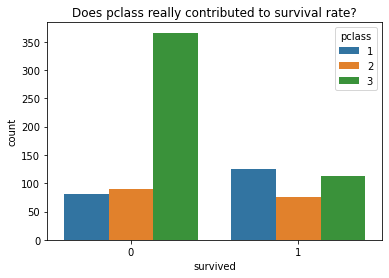

In [42]:
plt.title("Does pclass really contributed to survival rate?")
sns.countplot(x = 'survived', hue= 'pclass', data = df_drop)
plt.show()

In [43]:
X= df_drop.drop(columns='survived')

In [44]:
y = df_drop['survived']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [46]:
X_train


,pclass,sex,age,sibsp,parch,cabin,embarked,boat
332,3,0,18.0,0,0,0,3,0
383,1,0,58.0,0,0,39,1,0
281,3,0,29.0,0,4,0,3,0
2,3,0,30.0,1,1,0,3,0
231,1,1,47.0,1,0,71,1,0
...,...,...,...,...,...,...,...,...
71,2,1,39.0,0,0,0,3,0
106,2,1,36.0,0,0,0,3,0
270,3,1,35.0,0,0,0,3,0
435,3,1,28.0,0,0,0,3,0


In [47]:
#Let's start by using Logistic Regression model since the problem is about classification
from sklearn.linear_model import LogisticRegression
#instanciating the model
lr = LogisticRegression(max_iter=100000)

In [48]:
#fitting our model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [49]:
lr_pred = lr.predict(X_test)

In [50]:
lr_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [51]:
#check the accuracy of your code
from sklearn.metrics import accuracy_score

In [52]:
acc = accuracy_score(y_test, lr_pred)

In [53]:
acc

0.9176470588235294

- Logistic regression gives accuraacy of 0.91 which is good

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
knn_pred = knn.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
knn_acc = accuracy_score(y_test, knn_pred)

In [60]:
knn_acc

0.9058823529411765

In [61]:
from sklearn.svm import SVC

In [62]:
svm = SVC(kernel='linear')

In [63]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
svm_pred = svm.predict(X_test)

In [65]:
acc_svm = accuracy_score(y_test, svm_pred)

In [66]:
acc_svm

0.9529411764705882

In [67]:
from sklearn.metrics import auc

In [68]:
from sklearn.metrics import precision_recall_curve

In [69]:
pre_rec_cur = precision_recall_curve(y_test, svm_pred )

In [70]:
pre_rec_cur

(array([0.4       , 0.98387097, 1.        ]),
 array([1.        , 0.89705882, 0.        ]),
 array([0, 1], dtype=int64))

In [71]:
gen_df

,passenger_id,survived
0,295,0
1,1150,0
2,89,0
3,1063,0
4,1020,0
...,...,...
454,1194,0
455,403,0
456,108,1
457,510,0


In [72]:
test_id = X_test.index

In [73]:
test_id

Int64Index([512, 357, 110, 684,  39,  66, 756, 260, 790, 467,
            ...
            656, 549, 586, 599,   7, 296, 155, 326, 101, 361],
           dtype='int64', length=170)

In [74]:
svm_submission = pd.DataFrame({"passenger_id": test_id, "survived": svm_pred})

In [75]:
svm_submission_csv = svm_submission.to_csv("mySvmSubmission.csv", index=False)

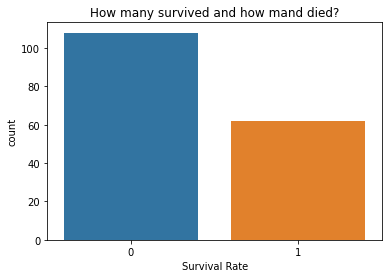

In [76]:
plt.title("How many survived and how mand died?")
plt.xlabel("Survival Rate")
plt.ylabel("Value Counts")
#plt.figure(figsize=(5,12))
sns.countplot(svm_pred)
plt.show()

In [80]:
test_id

Int64Index([512, 357, 110, 684,  39,  66, 756, 260, 790, 467,
            ...
            656, 549, 586, 599,   7, 296, 155, 326, 101, 361],
           dtype='int64', length=170)

In [79]:
import pickle

pickle.dump(svm,open('titanic_classifier.pkl','wb'))
model=pickle.load(open('titanic_classifier.pkl','rb'))

In [99]:
model.predict([[0,0,0,0,0,0,0,0]])

array([1], dtype=int64)

In [91]:
titanic_train.head(1)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
